In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
from datetime import datetime
import random, itertools
import re,string,unicodedata
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import spacy
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\omogh\Desktop\DATA MINING 1 HWS 2021\DM Project\full_data_for_classification_with_aggregated_values.csv').drop(['Unnamed: 0','Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                    'binary_severe_thunderstorm','Totals_idx_cat'],axis=1)

data.head()

,avg_tot_tot_indx,Var_perc_type,avg_perc_type,Var_surface_temperature,avg_surface_temperature,mean_Total_column_water_vapour,var_Total_column_water_vapour,mean_Total_column_water,var_Total_column_water,mean_U_component_stokes_drift,...,log_mean_two_m_dewpoint_temperature,log_var_two_m_dewpoint_temperature,log_mean_skin_temperature,log_var_skin_temperature,log_mean_surface_air_pressure,log_var_surface_air_pressure,log_var_hundred_metre_U_wind_component,log_var_neutral_wind_at_10_m_u_component,log_var_neutral_wind_at_10_m_v_component,log_m_medium_ccover
0,28.871947,5.874891,2.750027,0.025682,273.917257,7.599388,0.001272,7.747149,0.001285,-18431.447355,...,5.607103,0.026250,5.606527,1.175620,11.513592,9.460258,0.874559,-0.223159,-0.175535,-1.757664
1,30.291684,2.901000,4.625008,0.060179,274.445440,7.407456,0.013036,7.547069,0.015819,-18431.453998,...,5.605994,-0.688409,5.602733,1.905473,11.514630,9.730405,-0.918407,-2.261514,-0.568122,-2.563193
2,33.781080,0.041236,5.104156,0.053122,273.841263,7.454112,0.079448,7.574160,0.086356,-18431.427509,...,5.600426,-1.904541,5.599713,1.943483,11.515923,8.261645,0.594675,-1.854602,-2.851444,-2.552162
3,34.847245,0.000000,4.999985,0.285297,273.133409,7.050555,0.002004,7.166458,0.002047,-18431.410131,...,5.589787,0.443992,5.589041,2.085777,11.511937,9.750797,-1.240046,-2.757890,-1.673033,-1.221444
4,36.648213,1.083323,4.749989,2.132644,272.328182,6.910032,0.103630,7.090256,0.089188,-18431.427458,...,5.583844,0.678679,5.589835,2.351766,11.505662,11.694134,0.532543,-1.089470,-0.906940,-1.948422


In [3]:
print("Shape of df: ",data.shape)
print("Info of df: ",data.info())
print("Describe df: ",data.describe())

Shape of df:  (3653, 246)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Columns: 246 entries, avg_tot_tot_indx to log_m_medium_ccover
dtypes: float64(245), int64(1)
memory usage: 6.9 MB
Info of df:  None
Describe df:         avg_tot_tot_indx  Var_perc_type  avg_perc_type  \
count       3653.000000    3653.000000    3653.000000   
mean          41.249196       0.552435       0.668481   
std            7.386613       1.394284       0.923793   
min            1.199944       0.000000       0.000000   
25%           37.267272       0.009984       0.083337   
50%           42.395158       0.123275       0.437520   
75%           46.414512       0.201407       0.854206   
max           57.560371      10.280782       5.895834   

       Var_surface_temperature  avg_surface_temperature  \
count              3653.000000              3653.000000   
mean                  5.702399               284.510018   
std                   6.049846                 7.284917   
min 

In [4]:
data['target+1'].value_counts()

0    2164
1    1489
Name: target+1, dtype: int64

In [5]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [6]:
X=data.drop('target+1',axis=1)
y=data['target+1']
X


,avg_tot_tot_indx,Var_perc_type,avg_perc_type,Var_surface_temperature,avg_surface_temperature,mean_Total_column_water_vapour,var_Total_column_water_vapour,mean_Total_column_water,var_Total_column_water,mean_U_component_stokes_drift,...,log_mean_two_m_dewpoint_temperature,log_var_two_m_dewpoint_temperature,log_mean_skin_temperature,log_var_skin_temperature,log_mean_surface_air_pressure,log_var_surface_air_pressure,log_var_hundred_metre_U_wind_component,log_var_neutral_wind_at_10_m_u_component,log_var_neutral_wind_at_10_m_v_component,log_m_medium_ccover
0,28.871947,5.874891,2.750027,0.025682,273.917257,7.599388,0.001272,7.747149,0.001285,-18431.447355,...,5.607103,0.026250,5.606527,1.175620,11.513592,9.460258,0.874559,-0.223159,-0.175535,-1.757664
1,30.291684,2.901000,4.625008,0.060179,274.445440,7.407456,0.013036,7.547069,0.015819,-18431.453998,...,5.605994,-0.688409,5.602733,1.905473,11.514630,9.730405,-0.918407,-2.261514,-0.568122,-2.563193
2,33.781080,0.041236,5.104156,0.053122,273.841263,7.454112,0.079448,7.574160,0.086356,-18431.427509,...,5.600426,-1.904541,5.599713,1.943483,11.515923,8.261645,0.594675,-1.854602,-2.851444,-2.552162
3,34.847245,0.000000,4.999985,0.285297,273.133409,7.050555,0.002004,7.166458,0.002047,-18431.410131,...,5.589787,0.443992,5.589041,2.085777,11.511937,9.750797,-1.240046,-2.757890,-1.673033,-1.221444
4,36.648213,1.083323,4.749989,2.132644,272.328182,6.910032,0.103630,7.090256,0.089188,-18431.427458,...,5.583844,0.678679,5.589835,2.351766,11.505662,11.694134,0.532543,-1.089470,-0.906940,-1.948422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,38.744972,5.332907,2.270866,1.618656,274.416872,6.840186,0.401473,7.004086,0.460048,-18579.274977,...,5.606387,1.681825,5.617187,0.614694,11.489351,13.981747,0.373514,-0.530780,-1.655888,-0.629004
3649,51.397479,1.457857,1.229208,0.499817,277.138496,6.427623,0.001849,6.548050,0.001899,-18522.404389,...,5.620021,0.926618,5.619009,1.493076,11.472777,7.772494,1.859356,0.660643,0.049828,-0.568217
3650,54.711400,1.964794,1.437538,0.185528,276.227551,6.372121,0.024774,6.474477,0.028831,-18655.147617,...,5.614617,-1.591896,5.616252,0.616240,11.482497,12.870306,1.841936,1.136060,-0.540050,-0.736719
3651,53.840718,0.000000,1.000046,0.185841,276.639502,7.225365,0.020061,7.418203,0.024127,-18749.982794,...,5.615807,-1.585190,5.615075,1.318412,11.495818,11.396372,-0.435599,-0.600936,-2.694180,-1.199515


In [7]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [8]:
X_train.shape, X_test.shape

((2557, 245), (1096, 245))

In [9]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [10]:
X_train_new.shape, X_val.shape, y_train_new.shape

((1789, 245), (768, 245), (1789,))

In [11]:
from sklearn.preprocessing import StandardScaler
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_val = sc.transform(X_val)

In [12]:
from sklearn.tree import DecisionTreeClassifier
#training the model
dt=DecisionTreeClassifier()
#Fitting the model 
dt=dt.fit(X_train_new,y_train_new)
print(dt)

DecisionTreeClassifier()


In [13]:
#Predicting the model 
dt_predict=dt.predict(X_val)
print(dt_predict)

[0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 1 

In [15]:
dt_score=accuracy_score(y_val,dt_predict)
print("Decision Tree Classifier_bow_score :",dt_score)
P, R, F1, _ = precision_recall_fscore_support(y_val, dt_predict, average='macro')
print('Precision: {}, Recall:{}, F1 Score: {}'.format(P, R, F1))

Decision Tree Classifier_bow_score : 0.6705729166666666
Precision: 0.658120405408241, Recall:0.6595567476002259, F1 Score: 0.6587416026344677


[[329 131]
 [122 186]]


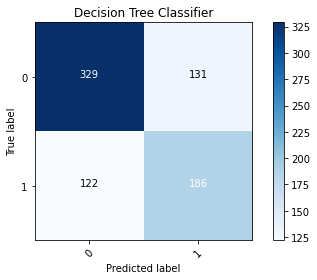

Decision Tree with accuracy of 
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       460
           1       0.59      0.60      0.60       308

    accuracy                           0.67       768
   macro avg       0.66      0.66      0.66       768
weighted avg       0.67      0.67      0.67       768



In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_val, dt_predict)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_val, dt_predict)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Decision Tree Classifier')



print("Decision Tree with accuracy of ".format(acc))
print(classification_report(y_val, dt_predict, target_names=['0','1']))

# Sampling Techniques using RandomUnderSampler, RandomOverSampler and SMOTE Over sampler

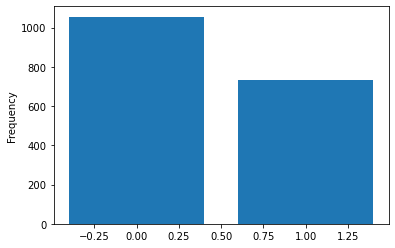

In [24]:
#inspect class distribution of target variable
import matplotlib.pyplot as plt

class_dist = y_train_new.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

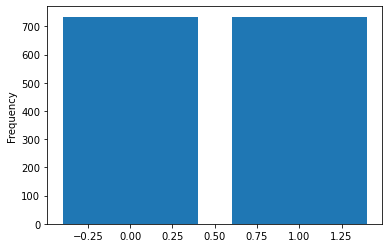

In [25]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
balanced_data, balanced_target = sampler.fit_resample(X_train_new, y_train_new)

class_dist = pd.Series(balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [26]:
from imblearn.pipeline import Pipeline

sampler = RandomUnderSampler()

pipeline = Pipeline([ ('normalisation', sc), ('balancing', sampler), ('classification', dt) ])

accuracy_scr = cross_val_score(pipeline, X_train_new, y_train_new, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))

Average Accuracy = 64.50536689473354%


In [28]:
# # define pipeline  for undersampling
model = DecisionTreeClassifier()
steps = [('under', RandomUnderSampler()), ('model', model)]
pipeline_under = Pipeline(steps=steps)

dt_under_sampling = pipeline_under.fit(X_train_new, y_train_new)
print(dt_under_sampling)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])


In [29]:
# ##Predicting the model for RandomUndersampling
dt_under_predict=pipeline_under.predict(X_val)
print(dt_under_predict)

[1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1
 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 1 

In [41]:
dt_under_score=accuracy_score(y_val,dt_under_predict)
print("dt_under_score :",dt_under_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,dt_under_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

dt_under_score : 0.6419270833333334
P: 0.6336326983236016, R:0.637789384528515, F1: 0.6340036911559557


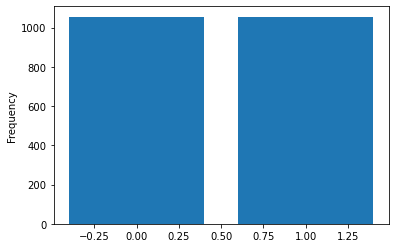

In [31]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
balanced_data, balanced_target = sampler.fit_resample(X_train_new, y_train_new)

class_dist = pd.Series(balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [32]:

sampler = RandomOverSampler()

pipeline_1 = Pipeline([ ('normalisation', sc), ('balancing', sampler), ('classification', dt) ])

accuracy_scr = cross_val_score(pipeline_1, X_train_new, y_train_new, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))

Average Accuracy = 64.61772644529533%


In [33]:
# # define pipeline  for oversampling
model = DecisionTreeClassifier()
steps = [('over', RandomOverSampler()), ('model', model)]
pipeline_over = Pipeline(steps=steps)

dt_over_sampling = pipeline_over.fit(X_train_new, y_train_new)
print(dt_over_sampling)

Pipeline(steps=[('over', RandomOverSampler()),
                ('model', DecisionTreeClassifier())])


In [34]:
# ##Predicting the model for RandomUndersampling
dt_over_predict=pipeline_over.predict(X_val)
print(dt_over_predict)

[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 

In [42]:
dt_over_score=accuracy_score(y_val,dt_over_predict)
print("dt_over_score :",dt_over_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,dt_over_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

dt_over_score : 0.6627604166666666
P: 0.6500626018591702, R:0.6514257481648786, F1: 0.6506485181119648


[[326 134]
 [125 183]]


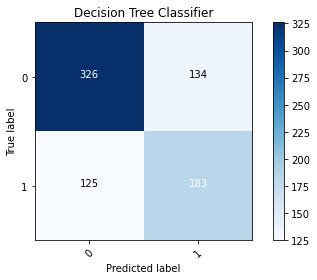

Decision Tree Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       460
           1       0.58      0.59      0.59       308

    accuracy                           0.66       768
   macro avg       0.65      0.65      0.65       768
weighted avg       0.66      0.66      0.66       768



In [43]:
# #compute the confusion matrix
cnf_matrix = confusion_matrix(y_val,dt_over_predict)
print(cnf_matrix)

# #compute accuracy score
acc = accuracy_score(y_val,dt_over_predict)

# #plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Decision Tree Classifier')



print("Decision Tree Classifier with accuracy of ".format(acc))
print(classification_report(y_val,dt_over_predict, target_names=['0','1']))

In [44]:
# # define pipeline  for undersampling and smote
model = DecisionTreeClassifier()
steps = [('under', RandomUnderSampler()),('over', SMOTE()), ('model', model)]
pipeline_under_over = Pipeline(steps=steps)

dt_under_sampling_smote_over_sampling = pipeline_under_over.fit(X_train_new, y_train_new)
print(dt_under_sampling_smote_over_sampling)



Pipeline(steps=[('under', RandomUnderSampler()), ('over', SMOTE()),
                ('model', DecisionTreeClassifier())])


In [45]:
# ##Predicting the model for RandomUndersampling and SMOTE oversampling
dt_under_over_predict=pipeline_under_over.predict(X_val)
print(dt_under_over_predict)

[0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 

In [40]:
dt_under_over_score=accuracy_score(y_val,dt_under_over_predict)
print("dt_under_over_score :",dt_under_over_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,dt_under_over_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

dt_under_over_score : 0.6419270833333334
P: 0.6356396573227832, R:0.6404714850367024, F1: 0.6353685591706015


In [46]:
#Define pipeline for DT smote sampling
model = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight = 'balanced', splitter='random')
steps = [('over', SMOTE()), ('model', model)]
pipeline = Pipeline(steps=steps)

dt_smote = pipeline.fit(X_train_new, y_train_new)
print(dt_smote)

Pipeline(steps=[('over', SMOTE()),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42, splitter='random'))])


In [47]:
#Predicting the model for smote sampling
dt_smote_predict=pipeline.predict(X_val)
print(dt_smote_predict)

[0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 1 1 

In [48]:
dt_smote_score=accuracy_score(y_val,dt_smote_predict)
print("dt_score :",dt_smote_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,dt_smote_predict, average='macro')
print('P: {}, R: {}, F1: {}'.format(P, R, F1))

dt_score : 0.6458333333333334
P: 0.6336336336336337, R: 0.6356860530773574, F1: 0.6343676487061722


[[316 144]
 [128 180]]


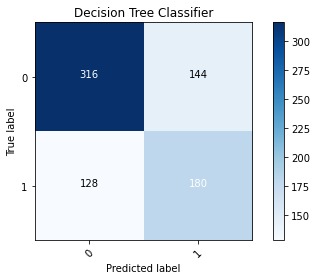

Decision Tree Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       460
           1       0.56      0.58      0.57       308

    accuracy                           0.65       768
   macro avg       0.63      0.64      0.63       768
weighted avg       0.65      0.65      0.65       768



In [49]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_val,dt_smote_predict)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_val,dt_smote_predict)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Decision Tree Classifier')



print("Decision Tree Classifier with accuracy of ".format(acc))
print(classification_report(y_val,dt_smote_predict, target_names=['0','1']))

# Feature Selection Using SelectKbest

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif
# feature selection using f_classif/ Select K best method

#define pipeline
model = DecisionTreeClassifier()
steps_1 = [('over', SMOTE()),  ('f_classif', SelectKBest(f_classif, k='all')), ('model', model)]
pipeline_1 = Pipeline(steps=steps_1)

In [60]:
dt_featur_selc_sampling_1 = pipeline_1.fit(X_train_new, y_train_new)
print(dt_featur_selc_sampling_1)

Pipeline(steps=[('over', SMOTE()), ('f_classif', SelectKBest(k='all')),
                ('model', DecisionTreeClassifier())])


In [61]:
##Predicting the model  for SelectKbest and SMOTE sampling
dt_featur_selc_predict_1=pipeline_1.predict(X_val)
print(dt_featur_selc_predict_1)

[0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 0 0 0 1 0 

In [63]:
dt_featur_selc_score_1=accuracy_score(y_val,dt_featur_selc_predict_1)
print("dt_feature selection_score :",dt_featur_selc_score_1)
P, R, F1, _ = precision_recall_fscore_support(y_val,dt_featur_selc_predict_1, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

dt_feature selection_score : 0.6510416666666666
P: 0.6422773146116718, R:0.6464709203839638, F1: 0.6428948172001221


[[308 152]
 [116 192]]


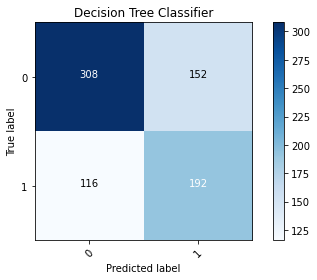

Decision Tree Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       460
           1       0.56      0.62      0.59       308

    accuracy                           0.65       768
   macro avg       0.64      0.65      0.64       768
weighted avg       0.66      0.65      0.65       768



In [65]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_val,dt_featur_selc_predict_1)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_val,dt_featur_selc_predict_1)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Decision Tree Classifier')



print("Decision Tree Classifier with accuracy of ".format(acc))
print(classification_report(y_val,dt_featur_selc_predict_1, target_names=['0','1']))

# Hyperparameter Tuning

In [66]:
# define models and parameters for hyperparametrs
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

# define grid search

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    "criterion": ['gini', 'entropy'],
    "class_weight": ['balanced'],
    "splitter": ['random', 'best']
}


# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
grid_search = HalvingGridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = cv,refit = True,verbose =1, n_jobs = -1, scoring = 'f1_macro', random_state =42)


In [67]:
# use randomoversampler 
steps_3 = [('smote', SMOTE()),  ('f_classif', SelectKBest(f_classif, k='all')), ('estimator', grid_search)]
pipeline_3 = Pipeline(steps=steps_3)
#fit the model
dt_hyperparameter = pipeline_3.fit(X_train_new, y_train_new)
print(dt_hyperparameter)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 703
max_resources_: 2110
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 703
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 2109
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Pipeline(steps=[('smote', SMOTE()), ('f_classif', SelectKBest(k='all')),
                ('estimator',
                 HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                     estimator=DecisionTreeClassifier(),
                                     n_jobs=-1,
                                     param_grid={'class_weight': ['balanced'],
                                                 'criterion': ['gini',
                                                               'entropy'],
                                                 'splitter': ['random',
       

In [68]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.6993878554858048
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'splitter': 'best'}


In [69]:
#Predicting the model for hyperparameters
dt_hyperparameter_predict = pipeline_3.predict(X_val)
print(dt_hyperparameter_predict)

[1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 1 0 1 1 

In [70]:
dt_final=accuracy_score(y_val,dt_hyperparameter_predict)
print("dt_hyperparameter_score :",dt_final)
P, R, F1, _ = precision_recall_fscore_support(y_val,dt_hyperparameter_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

dt_hyperparameter_score : 0.6536458333333334
P: 0.640796645702306, R:0.6422077922077922, F1: 0.6413860899483903


In [71]:
# use SMOTE on initial train test set
steps_4 = [('smote', SMOTE()),  ('f_classif', SelectKBest(f_classif, k='all')), ('estimator', grid_search)]
pipeline_4 = Pipeline(steps=steps_4)
#fit the model
dt_hyperparameter = pipeline_4.fit(X_train, y_train)
print(dt_hyperparameter)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1010
max_resources_: 3030
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 1010
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 3030
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Pipeline(steps=[('smote', SMOTE()), ('f_classif', SelectKBest(k='all')),
                ('estimator',
                 HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                     estimator=DecisionTreeClassifier(),
                                     n_jobs=-1,
                                     param_grid={'class_weight': ['balanced'],
                                                 'criterion': ['gini',
                                                               'entropy'],
                                                 'splitter': ['random',
     

In [72]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.70040853226797
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'splitter': 'best'}


In [73]:
#Predict the model using hyperparameter on held out test set
dt_hyperparameter_predict = pipeline_4.predict(X_test)
print(dt_hyperparameter_predict)


[0 1 0 ... 1 1 1]


In [74]:
dt_final_test=accuracy_score(y_test,dt_hyperparameter_predict)
print("dt_hyperparameter_score :",dt_final_test)
P, R, F1, _ = precision_recall_fscore_support(y_test,dt_hyperparameter_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

dt_hyperparameter_score : 0.6806569343065694
P: 0.6729427210449244, R:0.677087103545982, F1: 0.6738794067937822


[[452 197]
 [153 294]]


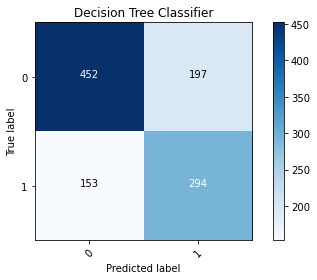

Decision Tree Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       649
           1       0.60      0.66      0.63       447

    accuracy                           0.68      1096
   macro avg       0.67      0.68      0.67      1096
weighted avg       0.69      0.68      0.68      1096



In [75]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test,dt_hyperparameter_predict)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test,dt_hyperparameter_predict)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Decision Tree Classifier')




print("Decision Tree Classifier with accuracy of ".format(acc))
print(classification_report(y_test,dt_hyperparameter_predict, target_names=['0','1']))

# Feature Importance Random Forest

In [107]:
import graphviz
from sklearn import tree


import matplotlib.pyplot as plt
dt.fit(X,y)
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X,  
                                class_names=y,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ValueError: Length of feature_names, 3653 does not match number of features, 245